In [1]:
import pandas as pd
import numpy as np

## Import data

https://www.kaggle.com/isaikumar/creditcardfraud

In [2]:
path = 'C:\\Users\\Yoonhee\\Desktop\\study\\chap3\\'
credit = pd.read_csv(path+'creditcard.csv')
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


class: fraud(1), otherwise(0)

In [3]:
credit.shape

(284807, 31)

## EDA

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

histogram plot

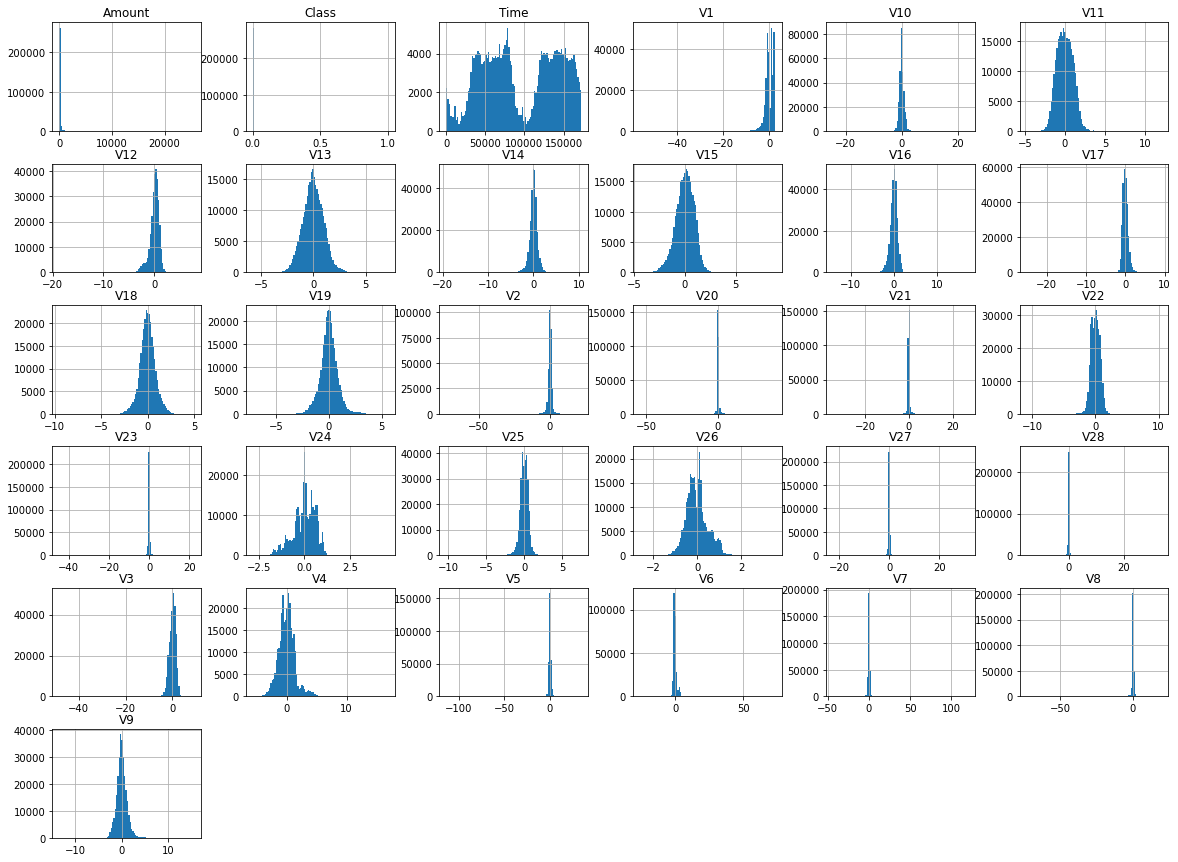

In [55]:
credit.hist(bins = 100, figsize = (20,15))
plt.show()    
#극단적으로 치우친 값들이 많은 것으로 보아 scaling이 필요함을 알게됨

이상치 제거

In [4]:
credit['V1'].sort_values(ascending=True)
credit = credit.drop([39769])
credit['V1'].sort_values(ascending=True)

220212   -46.855047
224569   -41.928738
234519   -40.470142
206255   -40.042537
220090   -37.558067
            ...    
167928     2.430507
155329     2.439207
251611     2.446505
230533     2.451888
193547     2.454930
Name: V1, Length: 284806, dtype: float64

In [5]:
credit['V3'].sort_values(ascending=True)
credit = credit.drop([274771, 118764])
credit['V3'].sort_values(ascending=True)

68454    -33.680984
44254    -32.965346
43432    -32.454198
43418    -31.813586
17480    -31.103685
            ...    
149035     4.069865
11729      4.079168
4023       4.101716
157665     4.187811
63551      4.226108
Name: V3, Length: 284804, dtype: float64

In [6]:
credit['V4'].sort_values(ascending=True)
credit = credit.drop([58465, 151296])
credit['V4'].sort_values(ascending=True)

180814    -5.683171
182620    -5.600607
224907    -5.560118
132217    -5.519697
172737    -5.416315
            ...    
199847    12.155016
262843    12.672760
108424    12.699542
220212    13.129143
24633     13.143668
Name: V4, Length: 284802, dtype: float64

In [7]:
credit['V7'].sort_values(ascending=True)
credit = credit.drop([284249])
credit['V7'].sort_values(ascending=True)

154684   -43.557242
154587   -41.506796
154371   -37.060311
154234   -33.239328
65423    -31.764946
            ...    
201638    30.897666
199032    31.527244
1632      34.303177
23128     36.677268
220090    36.877368
Name: V7, Length: 284801, dtype: float64

In [8]:
credit['V8'].sort_values(ascending=True)
credit = credit.drop([65423])
credit['V8'].sort_values(ascending=True)

138215   -50.943369
138706   -50.688419
139217   -50.420090
18633    -41.484823
154684   -41.044261
            ...    
44254     18.709255
17366     18.748872
17407     19.168327
17453     19.587773
17480     20.007208
Name: V8, Length: 284800, dtype: float64

In [9]:
credit['V23'].sort_values(ascending=True)
credit = credit.drop([91896])
credit['V23'].sort_values(ascending=True)

233904   -36.666000
227921   -32.828995
226690   -30.269720
220212   -27.533643
186714   -27.215436
            ...    
93612     19.002942
228158    19.228169
279610    20.803344
265657    22.083545
228723    22.528412
Name: V23, Length: 284799, dtype: float64

In [10]:
credit['Amount'].sort_values(ascending = True).tail()
credit = credit.drop([227921, 169457, 54018, 46841])
credit['Amount'].sort_values(ascending = True)

94994        0.00
18749        0.00
161039       0.00
57173        0.00
161044       0.00
           ...   
19760     7879.42
228158    8182.70
226690    8360.00
245474    8787.00
74699     8790.26
Name: Amount, Length: 284795, dtype: float64

상관관계 plot

In [139]:
#상관관계 plot
corr = credit.corr()
corr.style.background_gradient(cmap='Blues').set_precision(2)
#크게 눈에 띄는 상관관계가 없어 모든 변수들을 다 사용해야될듯

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.00,0.12,-0.01,-0.42,-0.11,0.18,-0.06,0.09,-0.04,-0.01,0.03,-0.25,0.12,-0.07,-0.10,-0.18,0.01,-0.07,0.09,0.03,-0.05,0.05,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01,-0.01
V1,0.12,1.00,-0.01,-0.01,0.00,-0.01,0.00,0.01,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.01,-0.00,-0.00,-0.01,0.00,-0.00,-0.00,0.00,0.01,-0.22,-0.10
V2,-0.01,-0.01,1.00,-0.01,0.01,-0.01,0.00,0.01,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.02,0.01,-0.01,-0.02,0.00,-0.01,-0.00,-0.00,0.02,-0.52,0.09
V3,-0.42,-0.01,-0.01,1.00,0.00,-0.01,0.01,0.01,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.01,0.00,-0.00,0.00,0.01,-0.00,-0.20,-0.19
V4,-0.11,0.00,0.01,0.00,1.00,0.00,-0.00,-0.01,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.01,-0.00,0.00,0.00,-0.00,-0.00,0.09,0.13
V5,0.18,-0.01,-0.01,-0.01,0.00,1.00,0.02,0.04,-0.01,-0.00,-0.01,0.00,-0.00,0.00,-0.00,0.00,0.01,-0.00,0.00,0.00,-0.01,-0.01,0.00,-0.00,0.00,0.00,0.00,0.03,-0.02,-0.37,-0.10
V6,-0.06,0.00,0.00,0.01,-0.00,0.02,1.00,-0.02,0.01,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.01,0.01,-0.00,0.00,-0.00,-0.00,-0.00,-0.02,0.02,0.20,-0.04
V7,0.09,0.01,0.01,0.01,-0.01,0.04,-0.02,1.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.01,0.00,-0.00,-0.00,0.01,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.03,0.02,0.37,-0.19
V8,-0.04,-0.00,-0.00,-0.00,0.00,-0.01,0.01,0.00,1.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.01,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.10,0.02
V9,-0.01,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,1.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.04,-0.10


## Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
col = credit.columns
col

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [13]:
minmaxscaler = MinMaxScaler()
credit = minmaxscaler.fit_transform(credit)
credit = pd.DataFrame(credit, columns = col)

In [14]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.922638,0.694503,0.955424,0.375067,0.548342,0.520556,0.544502,0.719403,0.579086,...,0.456579,0.531327,0.617550,0.423290,0.507766,0.310131,0.454870,0.297688,0.017021,0.0
1,0.000000,0.974385,0.699182,0.892906,0.325669,0.553567,0.508720,0.540544,0.719211,0.553098,...,0.452437,0.478193,0.621128,0.363989,0.510339,0.368762,0.448404,0.298798,0.000306,0.0
2,0.000006,0.922667,0.677008,0.935292,0.322038,0.546180,0.549629,0.551363,0.721503,0.500249,...,0.461895,0.559957,0.634780,0.313047,0.477385,0.319441,0.446301,0.296488,0.043077,0.0
3,0.000006,0.930618,0.692951,0.935814,0.256011,0.552644,0.537607,0.544478,0.723332,0.505606,...,0.454782,0.515525,0.616201,0.242154,0.542320,0.304023,0.451657,0.300247,0.014050,0.0
4,0.000012,0.926726,0.707624,0.929370,0.323273,0.547439,0.512594,0.548895,0.714199,0.598138,...,0.456756,0.561499,0.617094,0.434127,0.485486,0.438820,0.458764,0.305015,0.007962,0.0


## train, test split

In [17]:
from sklearn.model_selection import train_test_split

In [15]:
credit['Class'].value_counts()

0.0    284303
1.0       492
Name: Class, dtype: int64

데이터의 Class가 심하게 불균형을 이루기 때문에 층화추출을 시행한다

In [16]:
X = credit.iloc[:,:30]
y = credit.iloc[:,30]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.3,
                                                   shuffle = True,
                                                   stratify = y,
                                                   random_state = 2020)

In [19]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (199356, 30)
X_test shape: (85439, 30)
y_train shape: (199356,)
y_test shape: (85439,)


In [20]:
y_train.value_counts()

0.0    199012
1.0       344
Name: Class, dtype: int64

In [21]:
y_test.value_counts()

0.0    85291
1.0      148
Name: Class, dtype: int64

## Model input

* SGD Classifier
* KNN(k-nearest neighbor)
* Decision Tree
* Random Forest
* SVM(Support Vector Machine)
* XGBoost(eXtra Gradient Boosting)
* LightGBM
* Logistic Regression
* SMOTE

#### 1. SGD Classifier

모델 적합

In [49]:
from sklearn.linear_model import SGDClassifier

In [50]:
sgd_clf = SGDClassifier(random_state = 2021)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=2021)

In [52]:
y_pred = sgd_clf.predict(X_test)

모델 평가

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [55]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[85278,    13],
       [   60,    88]], dtype=int64)

In [58]:
#precision, recall score
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.8712871287128713
0.5945945945945946


In [60]:
#f1 score
f1_score(y_test, y_pred)

0.7068273092369478

In [64]:
#AUC
roc_auc_score(y_test, y_pred)

0.7972210876151503

#### 2. kNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn_clf = KNeighborsClassifier(n_neighbors = 2)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [68]:
y_pred = knn_clf.predict(X_test)

모델 평가

In [69]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[85288,     3],
       [   37,   111]], dtype=int64)

In [70]:
#precision, recall score
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.9736842105263158
0.75


In [71]:
#f1 score
f1_score(y_test, y_pred)

0.8473282442748091

In [72]:
#AUC
roc_auc_score(y_test, y_pred)

0.8749824131502738

#### 3. Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [76]:
y_pred = dt_clf.predict(X_test)

plot tree

In [81]:
from sklearn import tree

[Text(82.78885122703028, 213.0912, 'X[17] <= 0.653\ngini = 0.003\nsamples = 199356\nvalue = [199012, 344]'),
 Text(60.36690777290641, 204.3936, 'X[10] <= 0.579\ngini = 0.368\nsamples = 308\nvalue = [75, 233]'),
 Text(42.05335148224941, 195.696, 'X[26] <= 0.303\ngini = 0.267\nsamples = 271\nvalue = [43, 228]'),
 Text(24.418075054209336, 186.9984, 'X[27] <= 0.502\ngini = 0.473\nsamples = 94\nvalue = [36, 58]'),
 Text(13.56559725233852, 178.3008, 'X[14] <= 0.606\ngini = 0.301\nsamples = 65\nvalue = [12, 53]'),
 Text(8.13935835140311, 169.60320000000002, 'X[8] <= 0.899\ngini = 0.103\nsamples = 55\nvalue = [3, 52]'),
 Text(5.426238900935408, 160.9056, 'X[28] <= 0.308\ngini = 0.071\nsamples = 54\nvalue = [2, 52]'),
 Text(2.713119450467704, 152.208, 'gini = 0.0\nsamples = 41\nvalue = [0, 41]'),
 Text(8.13935835140311, 152.208, 'X[29] <= 0.0\ngini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(5.426238900935408, 143.5104, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(10.852477801870815, 14

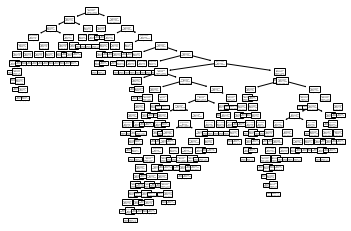

In [83]:
tree.plot_tree(dt_clf)

모델 평가

In [77]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[85249,    42],
       [   33,   115]], dtype=int64)

In [78]:
#precision, recall score
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.732484076433121
0.777027027027027


In [79]:
#f1 score
f1_score(y_test, y_pred)

0.7540983606557377

In [80]:
#AUC
roc_auc_score(y_test, y_pred)

0.8882672976173462

#### 4. Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [86]:
y_pred = rf_clf.predict(X_test)

모델 평가

In [87]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[85284,     7],
       [   29,   119]], dtype=int64)

In [88]:
#precision, recall score
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.9444444444444444
0.8040540540540541


In [89]:
#f1 score
f1_score(y_test, y_pred)

0.8686131386861313

In [90]:
#AUC
roc_auc_score(y_test, y_pred)

0.9019859910443324

#### 5. Support Vector Machine

In [91]:
from sklearn import svm

In [92]:
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [93]:
y_pred = svm_clf.predict(X_test)

모델 평가

In [94]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[85265,    26],
       [   27,   121]], dtype=int64)

In [95]:
#precision, recall score
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.8231292517006803
0.8175675675675675


In [96]:
#f1 score
f1_score(y_test, y_pred)

0.8203389830508475

In [97]:
#AUC
roc_auc_score(y_test, y_pred)

0.9086313644194899

#### 6. XGBoost

In [98]:
import xgboost as xgb

In [100]:
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label = y_test)

In [101]:
params = { 'max_depth':3,
           'eta': 0.1,
           'objective':'binary:logistic',
           'eval_metric':'logloss'
        }
num_rounds = 400

# train 데이터 셋은 ‘train’ , evaluation(test) 데이터 셋은 ‘eval’ 로 명기합니다. 
wlist = [(dtrain,'train'),(dtest,'eval') ]
# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtrain , num_boost_round=num_rounds , \
                      early_stopping_rounds=100, evals=wlist )

[0]	train-logloss:0.59854	eval-logloss:0.59834
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.52081	eval-logloss:0.52082
[2]	train-logloss:0.45614	eval-logloss:0.45605
[3]	train-logloss:0.40126	eval-logloss:0.40131
[4]	train-logloss:0.35459	eval-logloss:0.35467
[5]	train-logloss:0.31423	eval-logloss:0.31436
[6]	train-logloss:0.27945	eval-logloss:0.27946
[7]	train-logloss:0.24889	eval-logloss:0.24900
[8]	train-logloss:0.22213	eval-logloss:0.22232
[9]	train-logloss:0.19869	eval-logloss:0.19884
[10]	train-logloss:0.17798	eval-logloss:0.17812
[11]	train-logloss:0.15964	eval-logloss:0.15977
[12]	train-logloss:0.14335	eval-logloss:0.14352
[13]	train-logloss:0.12881	eval-logloss:0.12903
[14]	train-logloss:0.11590	eval-logloss:0.11613
[15]	train-logloss:0.10439	eval-logloss:0.10461
[16]	train-logloss:0.09408	eval-logloss:0.09433
[17]	train-logloss:0.08489	eval-logloss:0.08

[167]	train-logloss:0.00109	eval-logloss:0.00252
[168]	train-logloss:0.00109	eval-logloss:0.00251
[169]	train-logloss:0.00108	eval-logloss:0.00251
[170]	train-logloss:0.00108	eval-logloss:0.00251
[171]	train-logloss:0.00108	eval-logloss:0.00251
[172]	train-logloss:0.00107	eval-logloss:0.00251
[173]	train-logloss:0.00106	eval-logloss:0.00250
[174]	train-logloss:0.00105	eval-logloss:0.00250
[175]	train-logloss:0.00105	eval-logloss:0.00250
[176]	train-logloss:0.00104	eval-logloss:0.00249
[177]	train-logloss:0.00103	eval-logloss:0.00249
[178]	train-logloss:0.00103	eval-logloss:0.00249
[179]	train-logloss:0.00102	eval-logloss:0.00249
[180]	train-logloss:0.00102	eval-logloss:0.00249
[181]	train-logloss:0.00102	eval-logloss:0.00249
[182]	train-logloss:0.00101	eval-logloss:0.00249
[183]	train-logloss:0.00100	eval-logloss:0.00249
[184]	train-logloss:0.00100	eval-logloss:0.00249
[185]	train-logloss:0.00099	eval-logloss:0.00248
[186]	train-logloss:0.00098	eval-logloss:0.00248
[187]	train-logloss:

In [104]:
pred_probs = xgb_model.predict(dtest)

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]

모델 평가

In [105]:
#confusion matrix
confusion_matrix(y_test, preds)

array([[85282,     9],
       [   29,   119]], dtype=int64)

In [106]:
#precision, recall score
print(precision_score(y_test, preds))
print(recall_score(y_test, preds))

0.9296875
0.8040540540540541


In [107]:
#f1 score
f1_score(y_test, preds)

0.8623188405797102

In [108]:
#AUC
roc_auc_score(y_test, preds)

0.9019742664778484

#### 7. LGBM

In [109]:
from lightgbm import LGBMClassifier

In [110]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
lgbm_clf.fit(X_train, y_train)

LGBMClassifier(boost_from_average=False, n_estimators=1000, num_leaves=64)

In [111]:
y_pred = lgbm_clf.predict(X_test)

모델 평가

In [113]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[85283,     8],
       [   29,   119]], dtype=int64)

In [114]:
#precision, recall score
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.937007874015748
0.8040540540540541


In [115]:
#f1 score
f1_score(y_test, y_pred)

0.8654545454545455

In [116]:
#AUC
roc_auc_score(y_test, y_pred)

0.9019801287610903

#### 8. Logistic Regression

In [117]:
from sklearn.linear_model import LogisticRegression

In [119]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

LogisticRegression()

In [120]:
y_pred = lr_clf.predict(X_test)

모델 평가

In [122]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[85280,    11],
       [   60,    88]], dtype=int64)

In [123]:
#precision, recall score
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.8888888888888888
0.5945945945945946


In [124]:
#f1 score
f1_score(y_test, y_pred)

0.7125506072874493

In [125]:
#AUC
roc_auc_score(y_test, y_pred)

0.7972328121816344